In [1]:
import pandas as pd
from fbprophet import Prophet 

import matplotlib.pyplot as plt

# 1. Intro

In [2]:
df = pd.read_csv('../data/BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


The way the Prophet library works is that time column name should be 'ds' and y column name should be 'y'. So, we will rename the columns. Also, 'ds' column should be datetime object.

In [7]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [10]:
# fit model - ignore train/test split for now 
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


It did not find weekly or daily seasonality so it's disabled automatically. It makes sense because it is monthly data. If I know the data has weekly or daily seasonality, we can set the parameters to be True.

In [11]:
# future dataframe - placeholder object
future = m.make_future_dataframe(periods=24, freq='MS')  # one period = one row = 1 month for this data

In [12]:
# start of the future df is same as the original data 
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [13]:
# end of the future df is original + 24 periods (2 years)
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [14]:
# predict the future on the model for the given future df 
forecast = m.predict(future)

In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1777.750825,1155.597216,1470.301730,1777.750825,1777.750825,-461.808985,-461.808985,-461.808985,-461.808985,-461.808985,-461.808985,0.0,0.0,0.0,1315.941840
1,1992-02-01,1780.417028,1184.504740,1520.859362,1780.417028,1780.417028,-426.178759,-426.178759,-426.178759,-426.178759,-426.178759,-426.178759,0.0,0.0,0.0,1354.238270
2,1992-03-01,1782.911219,1446.180601,1776.293359,1782.911219,1782.911219,-178.363746,-178.363746,-178.363746,-178.363746,-178.363746,-178.363746,0.0,0.0,0.0,1604.547472
3,1992-04-01,1785.577422,1438.838518,1754.354354,1785.577422,1785.577422,-195.905793,-195.905793,-195.905793,-195.905793,-195.905793,-195.905793,0.0,0.0,0.0,1589.671629
4,1992-05-01,1788.157619,1653.882072,1994.359708,1788.157619,1788.157619,45.003300,45.003300,45.003300,45.003300,45.003300,45.003300,0.0,0.0,0.0,1833.160919


/Users/minkyung/Dropbox/mk-personal-repo/time-series-analysis/venv-timeseries/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/minkyung/Dropbox/mk-personal-repo/time-series-analysis/venv-timeseries/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


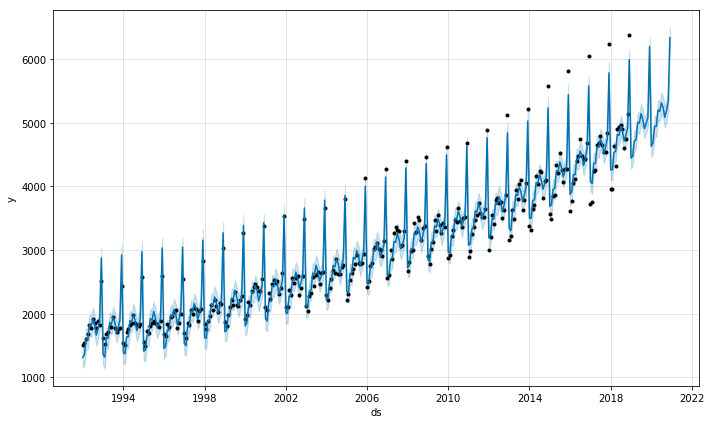

In [17]:
# Prophet's own plotting tool to see 
m.plot(forecast);

(735234.0, 737791.0)

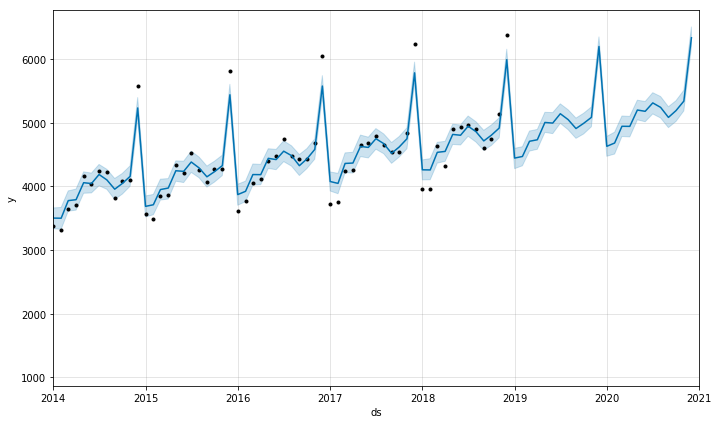

In [18]:
# zoom in for the prediction
m.plot(forecast);
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2021-01-01'))

/Users/minkyung/Dropbox/mk-personal-repo/time-series-analysis/venv-timeseries/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/minkyung/Dropbox/mk-personal-repo/time-series-analysis/venv-timeseries/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


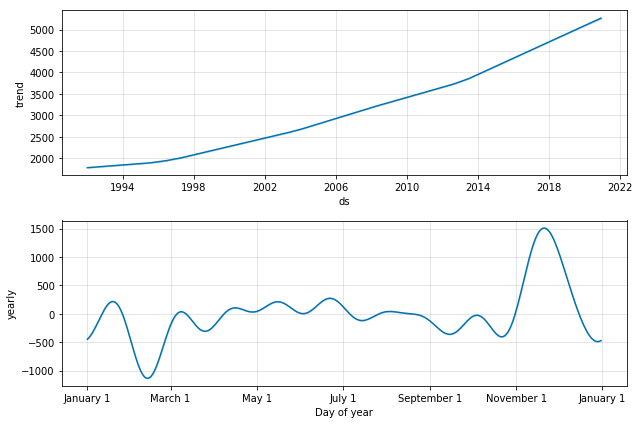

In [19]:
m.plot_components(forecast);

# 2. Evaluation

In [20]:
df = pd.read_csv('../Data/Miles_Traveled.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [23]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [24]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [54]:
df.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


In [25]:
len(df)

588

In [26]:
train = df.iloc[:576]
test = df.iloc[576:]

In [27]:
# fit model 
m = Prophet()
m.fit(train)

# create future data 
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263332.075594,274349.439901,285365.317570,263243.662770,263396.370675,16449.176404,16449.176404,16449.176404,16449.176404,16449.176404,16449.176404,0.0,0.0,0.0,279781.251998
584,2018-09-01,263472.647137,256305.907339,267854.148612,263340.018190,263561.793690,-1668.588186,-1668.588186,-1668.588186,-1668.588186,-1668.588186,-1668.588186,0.0,0.0,0.0,261804.058951
585,2018-10-01,263608.684114,263567.339573,274348.342649,263430.544100,263724.284925,5307.790802,5307.790802,5307.790802,5307.790802,5307.790802,5307.790802,0.0,0.0,0.0,268916.474916
586,2018-11-01,263749.255657,249579.721681,261001.530770,263548.642518,263898.034912,-8206.648040,-8206.648040,-8206.648040,-8206.648040,-8206.648040,-8206.648040,0.0,0.0,0.0,255542.607617
587,2018-12-01,263885.292634,251205.183999,262359.554901,263631.196304,264079.704119,-6919.794734,-6919.794734,-6919.794734,-6919.794734,-6919.794734,-6919.794734,0.0,0.0,0.0,256965.497900


(576, 588)

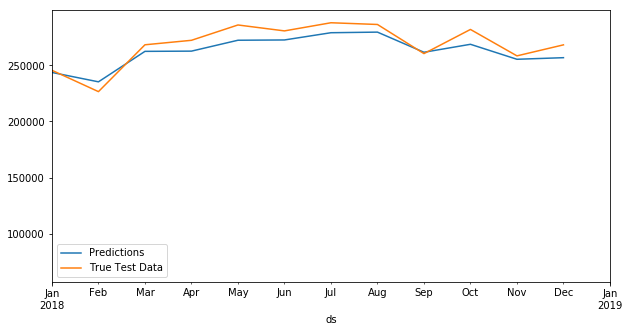

In [40]:
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(10, 5))
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax)
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-01-01'))

## Normal way of calculating performance

In [42]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-12:]['yhat']
actuals = test['y']

rmse(predictions, actuals)

8672.829976541623

## Prophet's diagnostics tools

In [43]:
from fbprophet.diagnostics import cross_validation, performance_metrics 
from fbprophet.plot import plot_cross_validation_metric

In [55]:
# horizon: prediction horizon for each fold (how far how do you want to forecast?)
horizon = str(365) + ' days'

# initial: initial training period
initial = str(5 * 365) + ' days'  # use 5 years of daily data to train

# period: spacing between cutoff dates
period = str(365) + ' days'


In [56]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 42 forecasts with cutoffs between 1975-12-12 00:00:00 and 2016-12-01 00:00:00


In [58]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1976-01-01,102282.737592,100903.320873,103653.469134,102460.0,1975-12-12
1,1976-02-01,96811.141761,95479.822785,98223.926491,98528.0,1975-12-12
2,1976-03-01,112360.483572,111000.943794,113692.351899,114284.0,1975-12-12
3,1976-04-01,112029.016859,110622.280635,113422.565442,117014.0,1975-12-12
4,1976-05-01,119161.998160,117640.485452,120619.116250,123278.0,1975-12-12
...,...,...,...,...,...,...
499,2017-08-01,273461.375852,267718.507169,279414.988173,283184.0,2016-12-01
500,2017-09-01,255582.789277,250361.578487,261404.705446,262673.0,2016-12-01
501,2017-10-01,262689.444631,257381.776196,268790.685459,278937.0,2016-12-01
502,2017-11-01,249341.802877,244127.700288,255588.726348,257712.0,2016-12-01


In [64]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,53 days,4.010239e+07,6332.644745,5266.671930,0.031509,0.029479,0.34
1,54 days,4.109227e+07,6410.325596,5296.390772,0.031396,0.029479,0.36
2,55 days,4.404002e+07,6636.265748,5542.733997,0.032319,0.030750,0.34
3,56 days,4.594746e+07,6778.455741,5796.048359,0.033363,0.032088,0.28
4,57 days,4.474610e+07,6689.252301,5783.663040,0.032856,0.031696,0.28
...,...,...,...,...,...,...,...
115,361 days,2.875645e+07,5362.504508,3933.075935,0.020114,0.014962,0.62
116,362 days,3.159028e+07,5620.522890,4135.046376,0.020846,0.014962,0.60
117,363 days,3.812092e+07,6174.213923,4589.277999,0.022699,0.016928,0.56
118,364 days,4.645319e+07,6815.657891,4945.342446,0.024046,0.018317,0.56


/Users/minkyung/Dropbox/mk-personal-repo/time-series-analysis/venv-timeseries/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/minkyung/Dropbox/mk-personal-repo/time-series-analysis/venv-timeseries/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/minkyung/Dropbox/mk-personal-repo/time-series-analysis/venv-timeseries/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y =

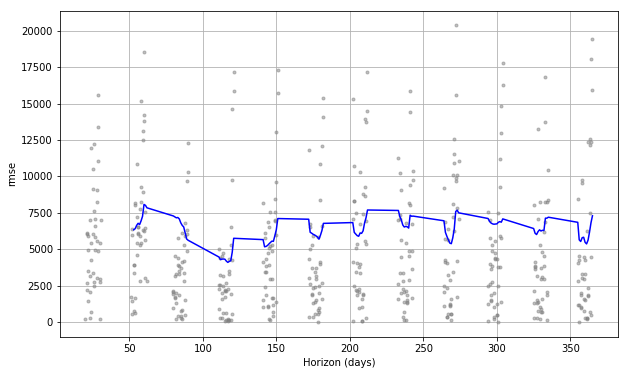

In [65]:
ax = plot_cross_validation_metric(df_cv, metric='rmse')